Honey Production
As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")


In [2]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [7]:
a = df.groupby('year')

In [47]:
#reset_index() function to name the column totalprod
prod_per_year = a.totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [49]:
X = prod_per_year['year']

In [50]:
X

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64

In [51]:
#reshape to create a matrix to be used by numpy plot - 1 column, many rows
X = X.values.reshape(-1, 1)

In [52]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

In [53]:
y = prod_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

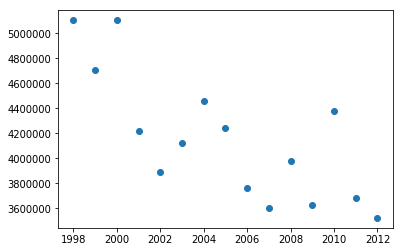

In [54]:
plt.scatter(X, y)

In [56]:
regr = linear_model.LinearRegression()

In [57]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
print(regr.coef_)

[-88303.18915238]


In [59]:
print(regr.intercept_)

181208083.1073298


In [60]:
y_predict = regr.predict(X)

In [61]:
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934684, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

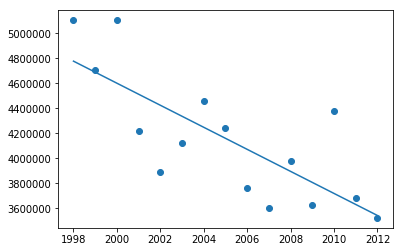

In [64]:
plt.scatter(X, y)
plt.plot(X, y_predict)

In [65]:
X_future = np.array(range(2013,2050))

In [67]:
X_future = X_future.reshape(-1, 1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049]])

In [68]:
future_predict = regr.predict(X_future)
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919])

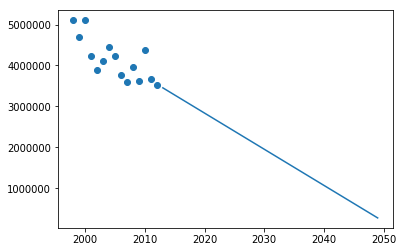

In [69]:
plt.scatter(X,y)
plt.plot(X_future, future_predict)